In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import pysindy as ps
from scipy.interpolate import griddata
from scipy.spatial import Delaunay
from scipy.interpolate import LinearNDInterpolator
import subprocess
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import openpyxl
import time
import pysindy as ps
from pysindy.optimizers import trapping_sr3
from sklearn.metrics import mean_squared_error
import matplotlib.ticker as ticker
from io import StringIO
import funcionesTFG as f


/tmp/ipykernel_2150754/2597749501.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import numpy as np, pandas as pd, matplotlib.pyplot as plt


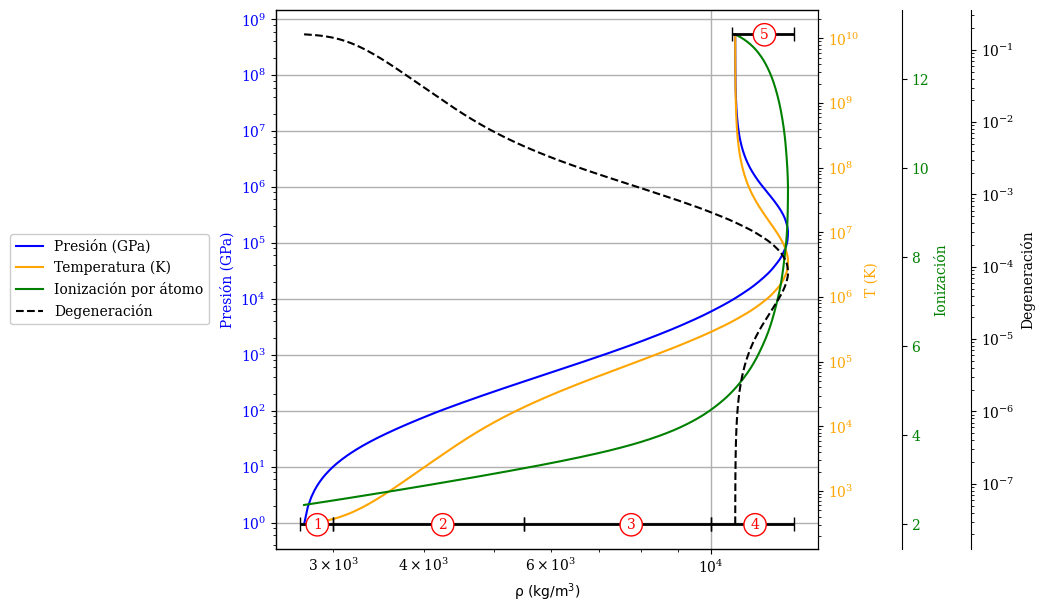

In [39]:
path = '/home/carlosfdhl/work/hugoniot/M0Al.txt'
datos_feos = f.leer_hugoniot(path)
r_feos = datos_feos["R (kg/m3)"].to_numpy(dtype=float)
p_feos = datos_feos["P (GPa)"].to_numpy(dtype=float)
T_feos = datos_feos["T (K)"].to_numpy(dtype=float) 
Z_feos = datos_feos["z"].to_numpy(dtype=float)
r_feos = r_feos[1:]
p_feos = p_feos[1:]
T_feos = T_feos[1:]#/11606
Z_feos = Z_feos[1:]

plt.rc('font', family='serif')
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(r_feos,p_feos, label=r'Presión (GPa)', color='blue')
ax.tick_params(axis='y', labelcolor='blue')
ax.set_ylabel("Presión (GPa)", color = 'blue')
ax.set_xlabel(r'$\mathrm{{\rho\ (kg/m^3)}}$')

#ax.set_title('Sin Multiplicador')
#ax.set_title('Con Multiplicador')

f.config_logPlots(ax)


twin=ax.twinx()
twin.plot(r_feos,T_feos, label=r'Temperatura (K)', color = 'orange')
twin.tick_params(axis='y', labelcolor='orange')
twin.set_ylabel("T (K)", color = 'orange')

twin.set_xscale('log')
twin.set_yscale('log')
twin1 = ax.twinx()
twin1.spines['right'].set_position(('outward', 60)) 
twin1.plot(r_feos,Z_feos, label=r'Ionización por átomo', color = 'green')
twin1.tick_params(axis='y', labelcolor='green')
twin1.set_ylabel("Ionización", color = 'green')

twin1.set_xscale('log')


kB = 8.617333e-5
n = r_feos/1000 * (Z_feos + 1) / (3.5 * 1.6726219e-24) #CH
eF = 3.65e-15 * n ** (2/3)

degeneracion = eF / (T_feos)

twin2 = ax.twinx()
twin2.spines['right'].set_position(('outward', 110)) 
twin2.plot(r_feos,degeneracion, label=r'Degeneración', color = 'black', linestyle='--')
twin2.tick_params(axis='y', labelcolor='black')
twin2.set_ylabel("Degeneración", color = 'black')

twin2.set_xscale('log')
twin2.set_yscale('log')

# Combinar las líneas y etiquetas de todas las leyendas
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = twin.get_legend_handles_labels()
lines3, labels3 = twin1.get_legend_handles_labels()
lines4, labels4 = twin2.get_legend_handles_labels()

all_lines = lines + lines2 + lines3 + lines4
all_labels = labels + labels2 + labels3 + labels4

# Crear una leyenda unificada fuera de la gráfica
fig.legend(all_lines, all_labels, loc='upper right', bbox_to_anchor=(0.04, 0.57), ncol=1, facecolor='white', framealpha=1)









tramos = {
    (2.7e3, 3.0e3): '1',
    (3.0e3, 5.5e3): '2',
    (5.5e3, 10.0e3): '3',
    (10.0e3, 13.0e3): '4',
    (10.7e3, 13.0e3): '5'  
}

altura_tramos = 0.95 * min(T_feos)

# Altura para los tramos 1 al 4, y altura especial para el tramo 5
altura_tramos = 2
altura_tramo_5 = 13#10**9

for (start, end), label in tramos.items():
    # Calcular el centro del tramo para posicionar el número
    center = (start + end) / 2
    
    # Dibujar el tramo y ajustar la altura según el tramo
    if label == '5':
        altura_actual = altura_tramo_5
    else:
        altura_actual = altura_tramos
    
    # Dibujar el tramo
    twin1.hlines(altura_actual, start, end, colors='black', lw=2)
    twin1.plot([start, end], [altura_actual, altura_actual], 'k|', markersize=10)  # Barras en los extremos
    
    # Colocar el número centrado en el tramo a la misma altura
    twin1.annotate(label, (center, altura_actual-0.1), color='red', ha='center',
                textcoords="offset points", xytext=(0,0), bbox=dict(boxstyle="circle", fc="white", ec="red"))


/tmp/ipykernel_2150754/2535252057.py:10: RuntimeWarning: invalid value encountered in power
  eF = 3.65e-15 * n ** (2/3)


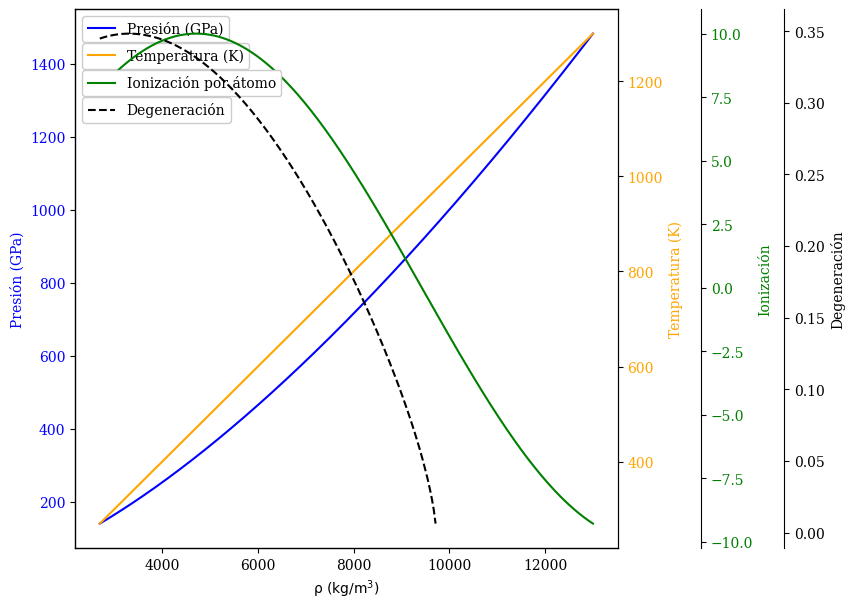

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Simulando algunos datos como ejemplo
r_feos = np.logspace(np.log10(2700), np.log10(13000), 400)
p_feos = r_feos**1.5 / 1000  # Presión simulada
T_feos = r_feos / 10  # Temperatura simulada
Z_feos = np.sin(r_feos / 3000) * 10  # Ionización simulada
n = r_feos/1000 * (Z_feos + 1) / (3.5 * 1.6726219e-24)
eF = 3.65e-15 * n ** (2/3)
degeneracion = eF / (T_feos)  # Degeneración simulada

plt.rc('font', family='serif')
fig, ax = plt.subplots(figsize=(7,7))

# Configurando gráficos
ax.plot(r_feos, p_feos, label='Presión (GPa)', color='blue')
ax.set_xlabel(r'$\mathrm{\rho\ (kg/m^3)}$')
ax.set_ylabel("Presión (GPa)", color='blue')
ax.tick_params(axis='y', labelcolor='blue')

twin = ax.twinx()
twin.plot(r_feos, T_feos, label='Temperatura (K)', color='orange')
twin.set_ylabel("Temperatura (K)", color='orange')
twin.tick_params(axis='y', labelcolor='orange')

twin1 = ax.twinx()
twin1.spines['right'].set_position(('outward', 60))
twin1.plot(r_feos, Z_feos, label='Ionización por átomo', color='green')
twin1.set_ylabel("Ionización", color='green')
twin1.tick_params(axis='y', labelcolor='green')

twin2 = ax.twinx()
twin2.spines['right'].set_position(('outward', 120))
twin2.plot(r_feos, degeneracion, label='Degeneración', linestyle='--', color='black')
twin2.set_ylabel("Degeneración", color='black')
twin2.tick_params(axis='y', labelcolor='black')

# Configuración de las leyendas
leg_ax = ax.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=1, facecolor='white', framealpha=1)
leg_twin = twin.legend(loc='upper left', bbox_to_anchor=(0, 0.95), ncol=1, facecolor='white', framealpha=1)
leg_twin1 = twin1.legend(loc='upper left', bbox_to_anchor=(0, 0.9), ncol=1, facecolor='white', framealpha=1)
leg_twin2 = twin2.legend(loc='upper left', bbox_to_anchor=(0, 0.85), ncol=1, facecolor='white', framealpha=1)

# Ajustando zorder para las leyendas
leg_ax.set_zorder(10)
leg_twin.set_zorder(10)
leg_twin1.set_zorder(10)
leg_twin2.set_zorder(10)

plt.show()


In [5]:
ruta_archivo = '/home/carlosfdhl/work/FEOS/run/Al-zbar.feos'
R_zbar,T_zbar, dataframe_ionizacion = f.procesar_archivo(ruta_archivo)

# Constante de Boltzmann en eV/K
kB = 8.617e-5
T_zbar = T_zbar / kB

LEER DATOS FEOS

In [6]:
path = "/home/carlosfdhl/work/FEOS/run/Al.hug"
datos_feos = f.leer_archivo_hugoniot(path)
RR0_feos = datos_feos['R/R0'].to_numpy(dtype = float)
P_feos = datos_feos['P (GPa)'].to_numpy(dtype = float)
R_feos = datos_feos['R (g/cm3)'].to_numpy(dtype = float)
R0=(R_feos[0])
T_feos = datos_feos['T (K)'].to_numpy(dtype = float)
RR0_zbar = R_zbar/R0

/tmp/ipykernel_3536167/1825617805.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos_Al_hug = pd.read_csv(path, sep='  ')


In [7]:
x = RR0_feos[0]
y = T_feos[0]
print(x,y)


idx_menor_x = np.argmin(np.abs(RR0_zbar[:] - x))
idx_mayor_x = np.argmin(np.abs(RR0_zbar[:] - x)) + 1
x_menor = RR0_zbar[idx_menor_x]
x_mayor = RR0_zbar[idx_mayor_x]
encontrado = False
while (encontrado == False):
        if x_menor<=x:
                if x_mayor >= x:
                        encontrado = True
                else: 
                        idx_mayor_x += 1
                        x_mayor = RR0_zbar[idx_mayor_x]
        else:
                idx_menor_x -= 1
                x_menor = RR0_zbar[idx_menor_x ]
  
idx_menor_y = np.argmin(np.abs(T_zbar[:] - y))
y_menor = T_zbar[idx_menor_y]
if y_menor > y:
        idx_menor_y -=1
        y_menor = T_zbar[idx_menor_y]
idx_mayor_y = idx_menor_y + 1
y_mayor = T_zbar[idx_mayor_y]
encontrado = False
while (encontrado == False):
        if y_menor<=y:
                if x_mayor >= x:
                        encontrado = True
                else: 
                        idx_mayor_y += 1
                        y_mayor = T_zbar[idx_mayor_y]
                        print(y_mayor)
                        print(y)
                        print(idx_mayor_y)
        else:
                idx_menor_y -= 1
                y_menor = T_zbar[idx_menor_y]

z1 = dataframe_ionizacion.loc[idx_mayor_x,idx_mayor_y]
z2 = dataframe_ionizacion.loc[idx_mayor_x,idx_menor_y]
z3 = dataframe_ionizacion.loc[idx_menor_x,idx_mayor_y]
z4 = dataframe_ionizacion.loc[idx_menor_x,idx_menor_y]

print(idx_menor_x,idx_mayor_x)
print(idx_menor_y,idx_mayor_y)
print(dataframe_ionizacion.loc[idx_menor_x,idx_menor_y])


1.0 300.04492741999996
120 121
8 9
2.42225434e+00


In [8]:
#Prueba interpolacion Triangulacion Delaunay
# punto inferior izdo, pto inferior dcho, pto superior izdo, pto superior dcho
puntos = np.array([(RR0_zbar[idx_menor_x], T_zbar[idx_menor_y]),(RR0_zbar[idx_mayor_x], T_zbar[idx_menor_y]),(RR0_zbar[idx_menor_x], T_zbar[idx_mayor_y]),(RR0_zbar[idx_mayor_x], T_zbar[idx_mayor_y]) ])
valores = np.array([dataframe_ionizacion.loc[idx_menor_x,idx_menor_y], dataframe_ionizacion.loc[idx_mayor_x,idx_menor_y], dataframe_ionizacion.loc[idx_menor_x,idx_mayor_y], dataframe_ionizacion.loc[idx_mayor_x,idx_mayor_y]])
x = RR0_feos[0]
y = T_feos[0]

tri = Delaunay(puntos)

# Interpolación
interpolador = LinearNDInterpolator(tri, valores) 
z = interpolador(x, y)

print(z)
print(z1,z2,z3,z4)
print(T_zbar[8])


2.4222087259562546
2.47111402e+00 2.47111198e+00 2.42185126e+00 2.42225434e+00
291.5035894162702


In [9]:
z_interpolado=[]
for x,y in zip(RR0_feos, T_feos):
        idx_menor_x = np.argmin(np.abs(RR0_zbar[:] - x))
        idx_mayor_x = np.argmin(np.abs(RR0_zbar[:] - x)) + 1
        x_menor = RR0_zbar[idx_menor_x]
        x_mayor = RR0_zbar[idx_mayor_x]
        encontrado = False
        while (encontrado == False):
                if x_menor<=x:
                        if x_mayor >= x:
                                encontrado = True
                        else: 
                                idx_mayor_x += 1
                                x_mayor = RR0_zbar[idx_mayor_x]
                else:
                        idx_menor_x -= 1
                        x_menor = RR0_zbar[idx_menor_x ]

        idx_menor_y = np.argmin(np.abs(T_zbar[:] - y))
        y_menor = T_zbar[idx_menor_y]
        if y_menor > y:
                idx_menor_y -=1
                y_menor = T_zbar[idx_menor_y]
        idx_mayor_y = idx_menor_y + 1
        y_mayor = T_zbar[idx_mayor_y]
        encontrado = False
        while (encontrado == False):
                if y_menor<=y:
                        if x_mayor >= x:
                                encontrado = True
                        else: 
                                idx_mayor_y += 1
                                y_mayor = T_zbar[idx_mayor_y]
                                print(y_mayor)
                                print(y)
                                print(idx_mayor_y)
                else:
                        idx_menor_y -= 1
                        y_menor = T_zbar[idx_menor_y]

        puntos = np.array([(RR0_zbar[idx_menor_x], T_zbar[idx_menor_y]),(RR0_zbar[idx_mayor_x], T_zbar[idx_menor_y]),(RR0_zbar[idx_menor_x], T_zbar[idx_mayor_y]),(RR0_zbar[idx_mayor_x], T_zbar[idx_mayor_y]) ])
        valores = np.array([dataframe_ionizacion.loc[idx_menor_x,idx_menor_y], dataframe_ionizacion.loc[idx_mayor_x,idx_menor_y], dataframe_ionizacion.loc[idx_menor_x,idx_mayor_y], dataframe_ionizacion.loc[idx_mayor_x,idx_mayor_y]])
        tri = Delaunay(puntos)

        # Interpolación
        interpolador = LinearNDInterpolator(tri, valores)
        z = interpolador(x, y)
        z_interpolado.append(float(z))
print(z_interpolado)

[2.4222087259562546, 2.446184461542637, 2.4489992097553035, 2.453910137402949, 2.4579372645296136, 2.461446341306525, 2.4660861317227223, 2.4789541452643906, 2.4865027928846057, 2.4934336153214636, 2.499921693976491, 2.506797287567853, 2.5150359129904283, 2.5240582969464045, 2.5346664411671593, 2.5447773822221027, 2.5544933931266263, 2.565834507673762, 2.579306224661978, 2.5912083121755862, 2.6041253289893134, 2.618054554103094, 2.6328196109134754, 2.647892477153064, 2.6627581835103102, 2.680171765774294, 2.696781635093357, 2.713588186332057, 2.7325758567869824, 2.750622093145471, 2.7694375562357934, 2.7903479991035285, 2.8101430058376864, 2.8315698629945896, 2.8536287241327165, 2.8746251838250005, 2.8977738367604142, 2.919796836341665, 2.944758558347757, 2.9682867463104907, 2.9924802249812923, 3.017948640847707, 3.0432592393286706, 3.0699662971987838, 3.095636967484496, 3.124039205033545, 3.1509354520362844, 3.179866202325761, 3.206930454926936, 3.2372699481616585, 3.2657042490398256,

In [10]:
dataframe_ionizacion.to_excel("dataframe_ionizacion.xlsx", index=False, engine='openpyxl')
data = {
    'RR0_feos': RR0_feos,
    'T_feos': T_feos,
    'z_interpolated': z_interpolado
}
df_vectores = pd.DataFrame(data)

# Guardar el DataFrame en un archivo Excel
df_vectores.to_excel("vectores.xlsx", index=False, engine='openpyxl')

In [11]:
lista = list(RR0_zbar)
lista2 = list(T_zbar)
print(lista.index(RR0_feos[0]))
y = T_feos[0]
print(np.argmin(np.abs(T_zbar[:] - y)))

120
8


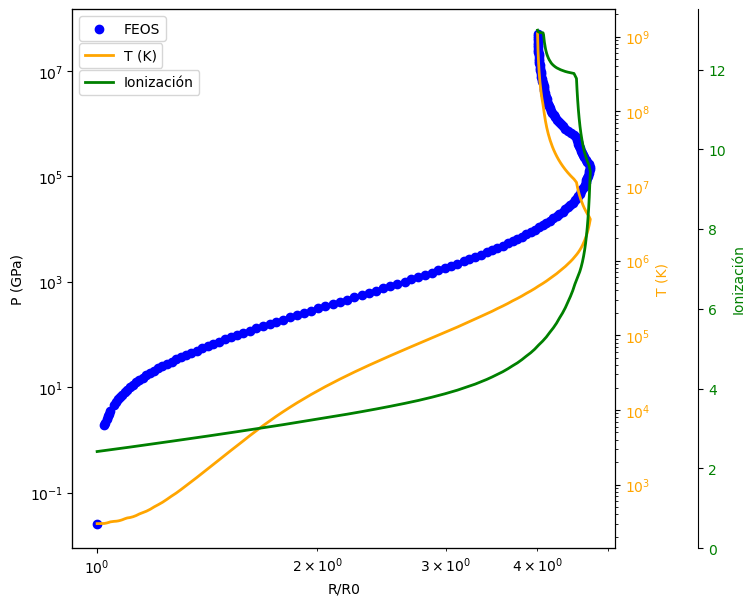

In [12]:
%matplotlib inline

#Definir datos
x1 = datos_feos['R/R0'].to_numpy(dtype = float)
y1 = datos_feos['P (GPa)'].to_numpy(dtype = float)
y2 = datos_feos['T (K)'].to_numpy(dtype=float)
y3 = z_interpolado

#Inicializar figura
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot() 

#Ejes principales
ax.scatter(x1, y1, label = "FEOS", color = 'blue')
ax.set_xlabel('R/R0')
ax.set_ylabel('P (GPa)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='upper left', bbox_to_anchor=(0, 1),  ncol=1)

#Eje T(K)
twin=ax.twinx()
twin.plot(x1,y2, label = "T (K)", color = 'orange', linewidth = 2)
twin.tick_params(axis='y', labelcolor='orange')
twin.set_ylabel("T (K)", color = 'orange')
twin.set_xscale('log')
twin.set_yscale('log')
twin.legend(loc='upper left', bbox_to_anchor=(0, 0.95),  ncol=1)

#Eje Ionización
twin2 = ax.twinx()
twin2.spines['right'].set_position(('outward', 60)) 
twin2.plot(x1,y3, label = "Ionización", color = 'green', linewidth = 2)
twin2.tick_params(axis='y', labelcolor='green')
twin2.set_ylabel("Ionización", color = 'green')
twin2.set_xscale('log')
twin2.legend(loc='upper left', bbox_to_anchor=(0, 0.9),  ncol=1)
twin2.set_ylim(0)
#twin2.set_yscale('log')




plt.show()

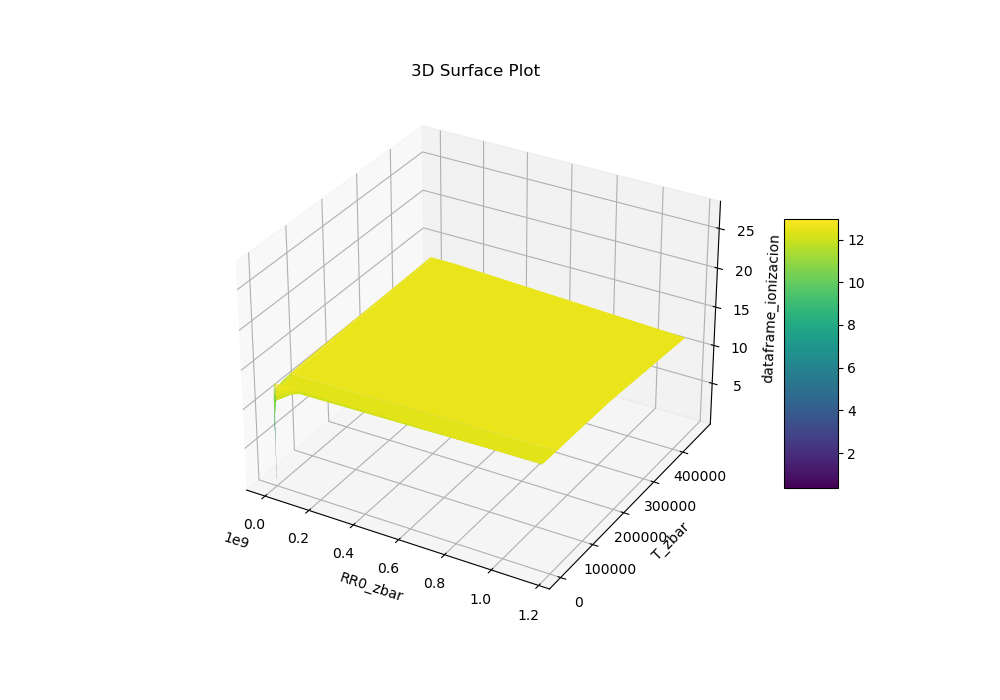

In [43]:
%matplotlib widget
Z = dataframe_ionizacion.to_numpy()

X, Y = np.meshgrid(T_zbar, RR0_zbar )

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_title('3D Surface Plot')
ax.set_xlabel('RR0_zbar')
ax.set_ylabel('T_zbar')
ax.set_zlabel('dataframe_ionizacion')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [13]:
x = []
y = []
z = []
for (i,valorx) in enumerate(RR0_zbar):
    for (j,valory) in enumerate(T_zbar):
        x.append(valorx)
        y.append(valory)
        z.append(dataframe_ionizacion.loc[i,j])
x= np.array(x,dtype = float)
y = np.array(y,dtype = float)
z = np.array(z,dtype = float)

(0.0, 13.517037338193703)

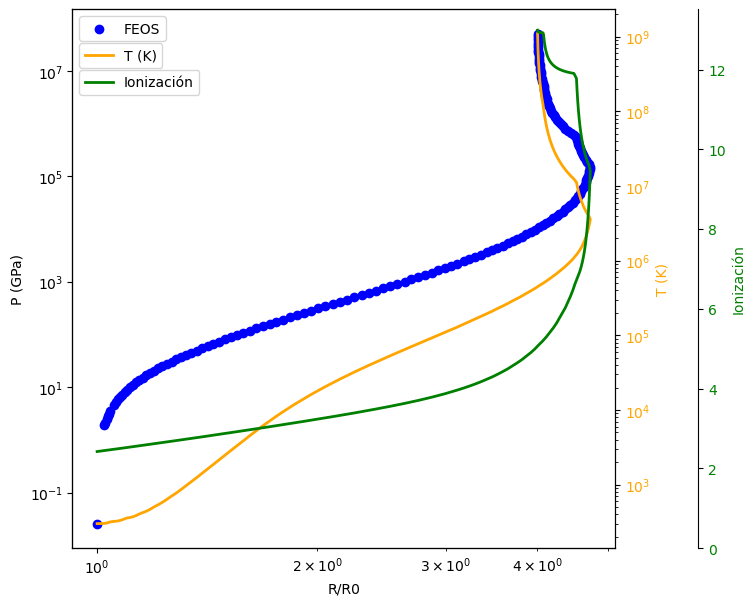

In [22]:
x_ = RR0_feos
y_ = T_feos

points = np.array(list(zip(x,y)))
points_to_interpolate = np.array(list(zip(x_,y_)))

z_ = griddata(points, z, points_to_interpolate, method = 'linear', rescale=True)


%matplotlib inline

#Definir datos
x1 = datos_feos['R/R0'].to_numpy(dtype = float)
y1 = datos_feos['P (GPa)'].to_numpy(dtype = float)
y2 = datos_feos['T (K)'].to_numpy(dtype=float)
y3 = z_

#Inicializar figura
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot() 

#Ejes principales
ax.scatter(x1, y1, label = "FEOS", color = 'blue')
ax.set_xlabel('R/R0')
ax.set_ylabel('P (GPa)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='upper left', bbox_to_anchor=(0, 1),  ncol=1)

#Eje T(K)
twin=ax.twinx()
twin.plot(x1,y2, label = "T (K)", color = 'orange', linewidth = 2)
twin.tick_params(axis='y', labelcolor='orange')
twin.set_ylabel("T (K)", color = 'orange')
twin.set_xscale('log')
twin.set_yscale('log')
twin.legend(loc='upper left', bbox_to_anchor=(0, 0.95),  ncol=1)

#Eje Ionización
twin2 = ax.twinx()
twin2.spines['right'].set_position(('outward', 60)) 
twin2.plot(RR0_feos,z_, label = "Ionización", color = 'green', linewidth = 2)
twin2.tick_params(axis='y', labelcolor='green')
twin2.set_ylabel("Ionización", color = 'green')
twin2.set_xscale('log')
twin2.legend(loc='upper left', bbox_to_anchor=(0, 0.9),  ncol=1)
twin2.set_ylim(0)
#twin2.set_yscale('log')

In [6]:
datos_experimentales = pd.read_excel('DatosExperimentales copy.xlsx', sheet_name = 'Polystyrene')
columna = 'R0 (g/cm3)'
valor_referencia = 1.05
porcentaje = 0.005
datos_experimentales = filtrar_dataframe(datos_experimentales, columna, valor_referencia, porcentaje)
path = "/home/carlosfdhl/work/FEOS/run/1000.hug"
datos_feos = leer_archivo_hugoniot(path)

/tmp/ipykernel_806409/2271720138.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos_Al_hug = pd.read_csv(path, sep='  ')


Gráfica varios r0

/tmp/ipykernel_1922365/2271720138.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos_Al_hug = pd.read_csv(path, sep='  ')
/tmp/ipykernel_1922365/2271720138.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos_Al_hug = pd.read_csv(path, sep='  ')


La palabra '2.7' en la línea que comienza con 'Rho0  =' ha sido reemplazada por '2.7'.
La palabra '2.7' en la línea que comienza con 'Rho0  =' ha sido reemplazada por '5.2170675'.


/tmp/ipykernel_1922365/2271720138.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos_Al_hug = pd.read_csv(path, sep='  ')


La palabra '5.2170675' en la línea que comienza con 'Rho0  =' ha sido reemplazada por '7.734134999999999'.


/tmp/ipykernel_1922365/2271720138.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos_Al_hug = pd.read_csv(path, sep='  ')


La palabra '7.734134999999999' en la línea que comienza con 'Rho0  =' ha sido reemplazada por '10.251202499999998'.


/tmp/ipykernel_1922365/2271720138.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos_Al_hug = pd.read_csv(path, sep='  ')


La palabra '10.251202499999998' en la línea que comienza con 'Rho0  =' ha sido reemplazada por '12.76827'.


/tmp/ipykernel_1922365/2271720138.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos_Al_hug = pd.read_csv(path, sep='  ')


La palabra '12.76827' en la línea que comienza con 'Rho0  =' ha sido reemplazada por '2.7'.


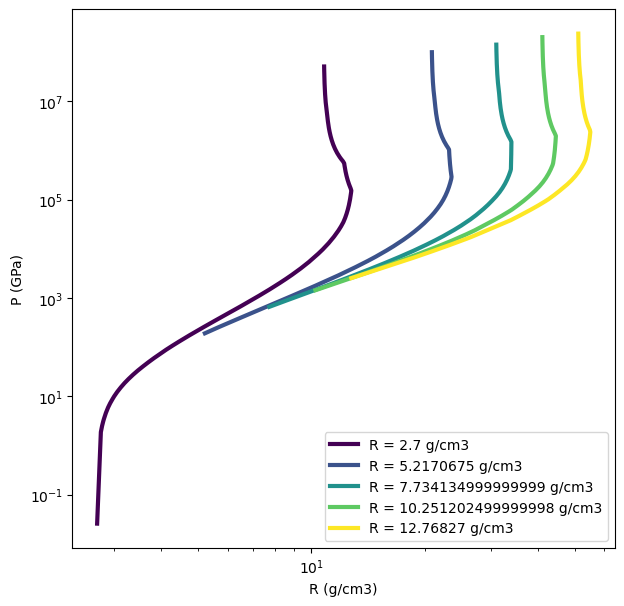

In [3]:
elemento ='Al'
valor_inicial = '2.7'
valor_actual = valor_inicial
inicio_linea = 'Rho0  ='
nombre_param = "Densidad Referencia"
path_archivo_entrada = "/home/carlosfdhl/work/FEOS/run/Al.par"
path_archivo_salida = "/home/carlosfdhl/work/FEOS/run/Al.hug"
cantidad = 5 #5 hugoniots adicionales a parte de la principal ->x1, y1
ejec_feos(elemento)
ejec_showeos(elemento, '5')
datos_feos = leer_archivo_hugoniot(path_archivo_salida)

x1 = datos_feos["R (g/cm3)"].to_list()
y1 = datos_feos["P (GPa)"].to_list()

max_x1 = max(x1)
idx_max_x1 = x1.index(max_x1)
probar = np.linspace(x1[0], x1[idx_max_x1], cantidad)
    
x_ = np.full((len(x1), cantidad), np.nan)
y_ = np.full((len(x1), cantidad), np.nan)
for i in range(cantidad):
    editar_palabra_en_archivo(path_archivo_entrada, inicio_linea, valor_actual, probar[i] )    
    valor_actual = probar[i]
    valor_actual = str(valor_actual)
    ejec_showeos(elemento, '5')
    datos_feos = leer_archivo_hugoniot(path_archivo_salida)
    x = datos_feos["R (g/cm3)"].to_numpy(dtype=float)
    y = datos_feos["P (GPa)"].to_numpy(dtype=float)
    x_[:len(x),i] = x
    y_[:len(y),i] = y

editar_palabra_en_archivo(path_archivo_entrada, inicio_linea, str(probar[cantidad-1]), valor_inicial ) 
ejec_feos(elemento)
ejec_showeos(elemento, '5')


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot() 

#ax.plot(x1, y1, label = ("R = %s g/cm3" %(valor_inicial)), color = 'blue')
colores = plt.cm.viridis(np.linspace(0, 1, len(probar)))
for i in range(cantidad):
    ax.plot(x_[:,i], y_[:,i], label = ("R = %s g/cm3" %(probar[i])), color = colores[i], linewidth = 3)
ax.set_xlabel('R (g/cm3)')
ax.set_ylabel('P (GPa)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()





In [19]:
valores = [0.02585257]

# Convertir cada valor a notación científica con el formato deseado
valores_formato_cientifico = [format(valor, ".6e") for valor in valores]

print(valores_formato_cientifico)

['2.585257e-02']


In [39]:
path_archivo_salida = "/home/carlosfdhl/work/FEOS/run/Al.hug"
datos_feos = leer_archivo_hugoniot(path_archivo_salida)
T = datos_feos["T (K)"].to_list()
T = [t / 11606 for t in T]
max_T = max(T)
idx_max_T = T.index(max_T)
probar = np.linspace(T[0], T[idx_max_T], cantidad)
print(probar)

[2.58525700e-02 2.37562169e+04 4.75124079e+04 7.12685990e+04
 9.50247900e+04]


/tmp/ipykernel_679151/2271720138.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos_Al_hug = pd.read_csv(path, sep='  ')


/tmp/ipykernel_2583577/2271720138.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos_Al_hug = pd.read_csv(path, sep='  ')
/tmp/ipykernel_2583577/2271720138.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos_Al_hug = pd.read_csv(path, sep='  ')


La palabra '2.585257e-2' en la línea que comienza con 'T0  =' ha sido reemplazada por '2.585257e-2'.
La palabra '2.7' en la línea que comienza con 'Rho0  =' ha sido reemplazada por '2.762324'.
La palabra '2.585257e-2' en la línea que comienza con 'T0  =' ha sido reemplazada por '7.405302e-2'.
La palabra '2.762324' en la línea que comienza con 'Rho0  =' ha sido reemplazada por '3.574218'.


/tmp/ipykernel_2583577/2271720138.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos_Al_hug = pd.read_csv(path, sep='  ')
/tmp/ipykernel_2583577/2271720138.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos_Al_hug = pd.read_csv(path, sep='  ')
/tmp/ipykernel_2583577/2271720138.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos_Al_hug = pd.read_csv(path, sep='  ')


La palabra '7.405302e-2' en la línea que comienza con 'T0  =' ha sido reemplazada por '3.088566e+0'.
La palabra '3.574218' en la línea que comienza con 'Rho0  =' ha sido reemplazada por '6.359858'.
La palabra '3.088566e+0' en la línea que comienza con 'T0  =' ha sido reemplazada por '3.140333e+1'.
La palabra '6.359858' en la línea que comienza con 'Rho0  =' ha sido reemplazada por '10.58065'.
La palabra '3.140333e+1' en la línea que comienza con 'T0  =' ha sido reemplazada por '2.615483e+2'.
La palabra '10.58065' en la línea que comienza con 'Rho0  =' ha sido reemplazada por '12.74834'.


/tmp/ipykernel_2583577/2271720138.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos_Al_hug = pd.read_csv(path, sep='  ')


La palabra '12.74834' en la línea que comienza con 'Rho0  =' ha sido reemplazada por '2.7'.
La palabra '2.615483e+2' en la línea que comienza con 'T0  =' ha sido reemplazada por '2.585257e-2'.


"\nfig2 = plt.figure(figsize=(7, 7))\nax2 = fig.add_subplot() \nT = float(probarT[3])\nR = float(probarR[3])\nax2.plot(x_[:,2], y_[:,2], label = label, color = colores[2], linewidth = 1)\n\nax2.plot(x_[:,3], y_[:,3], label = label, color = colores[3], linewidth = 1)\nax2.set_xscale('log')\nax2.grid()\nax2.set_yscale('log')\n"

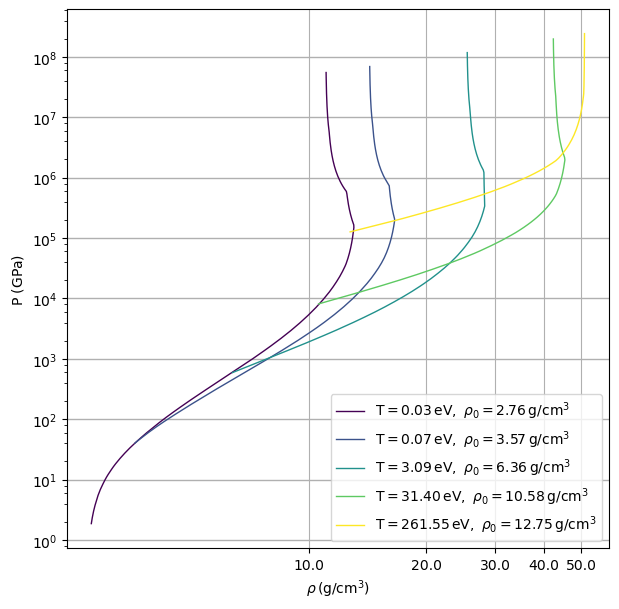

In [22]:
elemento ='Al'
valor_inicialT = '2.585257e-2'
valor_actualT = valor_inicialT
inicio_lineaT = 'T0  ='
valor_inicialR = '2.7'
valor_actualR = valor_inicialR
inicio_lineaR = 'Rho0  ='
nombre_paramT = "Temperatura Referencia"
path_archivo_entrada = "/home/carlosfdhl/work/FEOS/run/Al.par"
path_archivo_salida = "/home/carlosfdhl/work/FEOS/run/Al.hug"
cantidad = 5 #5 hugoniots adicionales a parte de la principal ->x1, y1
ejec_feos(elemento)
ejec_showeos(elemento, '5')
datos_feos = leer_archivo_hugoniot(path_archivo_salida)

x1 = datos_feos["R (g/cm3)"].to_list()
x1=x1[1:]
y1=y1[1:]
y1 = datos_feos["P (GPa)"].to_list()
T = datos_feos["T (K)"].to_list()
T = [t / 11606 for t in T]




max_x1 = max(x1)
idx_max_x1 = x1.index(max_x1)
intervalo = (max_x1 - x1[0]) / (cantidad - 1)

probarR = encontrar_valores_equiespaciados(x1,cantidad)
probarT=[]
for valor in probarR:
    indice = x1.index(valor)
    probarT.append(T[indice])

probarR= [str(R) for R in probarR]


probarT = [custom_scientific_format(T) for T in probarT]




x_ = np.full((len(x1), cantidad), np.nan)
y_ = np.full((len(x1), cantidad), np.nan)
for i in range(cantidad):
    editar_palabra_en_archivo(path_archivo_entrada, inicio_lineaT, valor_actualT, probarT[i] )
    editar_palabra_en_archivo(path_archivo_entrada, inicio_lineaR, valor_actualR, probarR[i] )    
    valor_actualR = probarR[i]

    valor_actualT = probarT[i]
    ejec_showeos(elemento, '5')
    datos_feos = leer_archivo_hugoniot(path_archivo_salida)
    x = datos_feos["R (g/cm3)"].to_numpy(dtype=float)
    y = datos_feos["P (GPa)"].to_numpy(dtype=float)
    x_[:len(x),i] = x
    y_[:len(y),i] = y
    
editar_palabra_en_archivo(path_archivo_entrada, inicio_lineaR, str(probarR[cantidad-1]), valor_inicialR ) 
editar_palabra_en_archivo(path_archivo_entrada, inicio_lineaT, str(probarT[cantidad-1]), valor_inicialT ) 
ejec_feos(elemento)
ejec_showeos(elemento, '5')


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot() 

#ax.plot(x1, y1, label = ("R = %s g/cm3" %(valor_inicial)), color = 'blue')
colores = plt.cm.viridis(np.linspace(0, 1, len(probarR)))
for i in range(cantidad):
    T = float(probarT[i])
    R = float(probarR[i])
    label = r"$\mathrm{{T}} = {:.2f}\, \mathrm{{eV}},\ \rho_0 = {:.2f}\, \mathrm{{g/cm^3}}$".format(T, R)
    ax.plot(x_[:,i], y_[:,i], label = label, color = colores[i], linewidth = 1)
ax.set_xlabel(r'$\rho \, \mathrm{(g/cm^3)}$')
ax.set_ylabel('$\mathrm{{P\ (GPa)}}$')
ax.set_xscale('log')
ax.grid()
ax.set_yscale('log')
ax.xaxis.set_major_locator(ticker.AutoLocator()) # Esta línea coloca las marcas automáticamente
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator()) # Para marcas menores, más finamente espaciadas

# Configurar las marcas (ticks) en el eje Y
ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation())
ax.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=15))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10, subs=(0.2,0.4,0.6,0.8), numticks=15))
#ax.grid(which='both', axis='y', linestyle='--', linewidth=0.5)
ax.grid(which='major', axis='y', linestyle='-', linewidth=1)

# Usar FormatStrFormatter para especificar el número de decimales
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f')) # Ejemplo para 1 decimal en el eje X
ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation())
ax.legend()
"""
fig2 = plt.figure(figsize=(7, 7))
ax2 = fig.add_subplot() 
T = float(probarT[3])
R = float(probarR[3])
ax2.plot(x_[:,2], y_[:,2], label = label, color = colores[2], linewidth = 1)

ax2.plot(x_[:,3], y_[:,3], label = label, color = colores[3], linewidth = 1)
ax2.set_xscale('log')
ax2.grid()
ax2.set_yscale('log')
"""


/tmp/ipykernel_3624108/1825617805.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos_Al_hug = pd.read_csv(path, sep='  ')


     R (g/cm3)         T (K)       P (GPa)     E (kJ/kg)    Us (km/s)  \
0     2.700000  3.000449e+02  2.578641e-02  1.041546e-02     0.000000   
1     2.762324  3.015451e+02  1.876615e+00  7.959303e+00     5.512012   
2     2.770417  3.030529e+02  2.121301e+00  1.011632e+01     5.525820   
3     2.783347  3.060910e+02  2.514512e+00  1.409700e+01     5.548098   
4     2.793950  3.091596e+02  2.839078e+00  1.784976e+01     5.566558   
..         ...           ...           ...           ...          ...   
167  10.824950  7.400048e+08  3.440447e+07  4.782070e+09  4120.293000   
168  10.821620  8.176281e+08  3.800228e+07  5.281609e+09  4330.597000   
169  10.818600  9.033936e+08  4.197748e+07  5.833547e+09  4551.675000   
170  10.815870  9.981556e+08  4.636966e+07  6.443380e+09  4784.078000   
171  10.813400  1.102858e+09  5.122256e+07  7.117183e+09  5028.384000   

       Up (km/s)      R/R0  
0       0.000000  1.000000  
1       0.124363  1.023083  
2       0.140453  1.026080  
3      

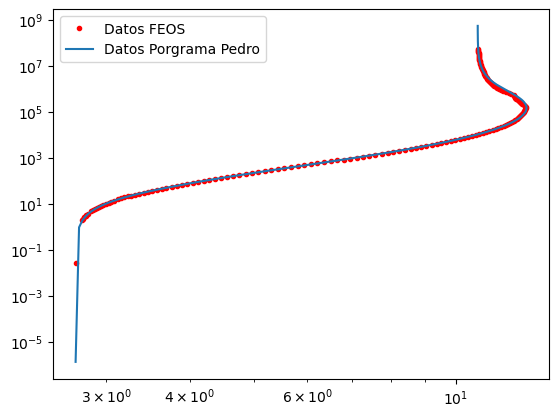

In [15]:
df=leer_hugoniot('/home/carlosfdhl/work/hugoniot/zz')
datos_feos = leer_archivo_hugoniot('/home/carlosfdhl/work/FEOS/run/Al.hug')
x=df["R (kg/m3)"].to_numpy(dtype=float)
x=x/0.001
y= df["P (GPa)"].to_numpy(dtype=float)
x2=datos_feos["R (g/cm3)"].to_numpy(dtype=float)
y2= datos_feos["P (GPa)"].to_numpy(dtype=float)
plt.plot(x2,y2, '.r', label="Datos FEOS")
plt.plot(x,y, label="Datos Porgrama Pedro")

plt.xscale('log')
plt.yscale('log')
plt.legend()
print(datos_feos)

<h1>Gráfico Distintas r0 Programa Pedro</h1>

        i     R (kg/m3)         T (K)          e(i)       P (GPa)  \
0       1   2700.000048  2.999932e+02 -6.584677e+01  1.324538e-06   
1       2   2728.094880  3.045829e+02  1.541805e+07  8.084580e-01   
2       3   2756.000306  3.092428e+02  6.159202e+07  1.636845e+00   
3       4   2783.214341  3.139740e+02  1.367247e+08  2.469388e+00   
4       5   2809.366627  3.187776e+02  2.373819e+08  3.292798e+00   
..    ...           ...           ...           ...           ...   
995   996  10813.578882  1.092022e+09  7.048935e+16  5.073110e+07   
996   997  10813.232056  1.108729e+09  7.156405e+16  5.150511e+07   
997   998  10812.891032  1.125692e+09  7.265519e+16  5.229096e+07   
998   999  10812.555714  1.142914e+09  7.376301e+16  5.308882e+07   
999  1000  10812.226011  1.160400e+09  7.488778e+16  5.389889e+07   

             u(i)   u(i)/cs          dedr          dpdr  j-1         error  \
0   -0.000000e+00 -0.000000 -1.381017e+09  2.777771e+11    0  0.000000e+00   
1    5.553034e+

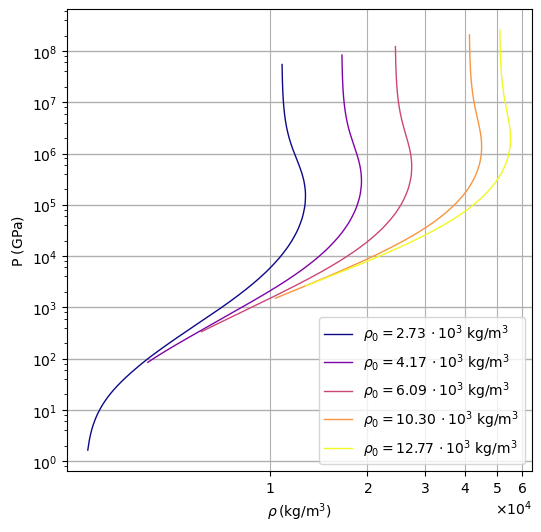

In [8]:

valor_inicial = '2.7'
valor_actual = valor_inicial
inicio_linea = 'r0='
nombre_param = "Densidad Referencia"
path_archivo_entrada = "/home/carlosfdhl/work/hugoniot/hugoniot.F90"
cantidad = 5 #5 hugoniots adicionales a parte de la principal ->x1, y1
datos_feos = f.ejec_hugoniot()
print(datos_feos)

x1 = datos_feos["R (kg/m3)"].to_list()
y1 = datos_feos["P (GPa)"].to_list()
x1=x1[1:]
y1=y1[1:]
max_x1 = max(x1)
idx_max_x1 = x1.index(max_x1)
probar = f.encontrar_valores_equiespaciados(x1,cantidad)
#probar = np.linspace(x1[0], x1[idx_max_x1], cantidad)

probar = [elemento / 1000 for elemento in probar]
    
x_ = np.full((len(x1), cantidad), np.nan)
y_ = np.full((len(x1), cantidad), np.nan)
for i in range(cantidad):
    f.editar_palabra_en_archivo(path_archivo_entrada, inicio_linea, valor_actual, probar[i] )    
    valor_actual = probar[i]
    valor_actual = str(valor_actual)
    datos_feos = f.ejec_hugoniot()
    x = datos_feos["R (kg/m3)"].to_numpy(dtype=float)
    y = datos_feos["P (GPa)"].to_numpy(dtype=float)
    x=x[1:]
    y=y[1:]
    x_[:len(x),i] = x
    y_[:len(y),i] = y

f.editar_palabra_en_archivo(path_archivo_entrada, inicio_linea, str(probar[cantidad-1]), valor_inicial ) 
df = f.ejec_hugoniot()


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot() 

#ax.plot(x1, y1, label = ("R = %s g/cm3" %(valor_inicial)), color = 'blue')
colores = plt.cm.viridis(np.linspace(0, 1, len(probar)))
for i in range(cantidad):
    R = probar[i]
    label = r"$\rho_0 = {:.2f}\, \cdot 10^{{3}}\ \mathrm{{kg/m^3}}$".format(R)
    ax.plot(x_[:,i], y_[:,i], label = label, color = colores[i], linewidth = 1)
ax.set_xlabel(r'$\rho \, \mathrm{(kg/m^3)}$')
ax.set_ylabel('$\mathrm{{P\ (GPa)}}$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid()

ax.xaxis.set_major_locator(ticker.AutoLocator()) # Esta línea coloca las marcas automáticamente
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator()) # Para marcas menores, más finamente espaciadas

# Configurar las marcas (ticks) en el eje Y
ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation())
ax.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=15))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10, subs=(0.2,0.4,0.6,0.8), numticks=15))
#ax.grid(which='both', axis='y', linestyle='--', linewidth=0.5)
ax.grid(which='major', axis='y', linestyle='-', linewidth=1)

# Usar FormatStrFormatter para especificar el número de decimales
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))  # Ajusta esto según tus necesidades
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation())
ax.legend(loc='lower right')

<h1>Gráfico Distintas r0 T0 Programa Pedro</h1>

[2728.0948803379965, 4623.353277387204, 8769.703865315221, 12772.460334056805]
La palabra 'ed%tref' en la línea que contiene 't0=' ha sido reemplazada por '0.02585257'.
La palabra '2.7' en la línea que contiene 'r0=' ha sido reemplazada por '2.7280948803379967'.
La palabra '0.02585257' en la línea que contiene 't0=' ha sido reemplazada por '0.5811553342540448'.
La palabra '2.7280948803379967' en la línea que contiene 'r0=' ha sido reemplazada por '4.623353277387204'.
La palabra '0.5811553342540448' en la línea que contiene 't0=' ha sido reemplazada por '13.264009503931778'.
La palabra '4.623353277387204' en la línea que contiene 'r0=' ha sido reemplazada por '8.769703865315222'.
La palabra '13.264009503931778' en la línea que contiene 't0=' ha sido reemplazada por '302.73136586832953'.
La palabra '8.769703865315222' en la línea que contiene 'r0=' ha sido reemplazada por '12.772460334056804'.
La palabra '12.772460334056804' en la línea que contiene 'r0=' ha sido reemplazada por '2.7'.
L

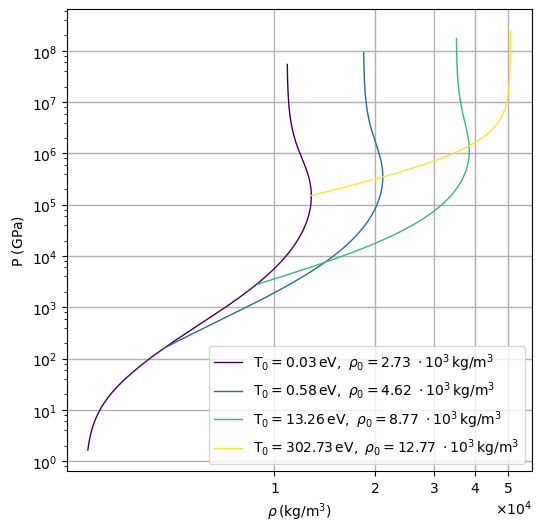

In [4]:
valor_inicialT = '0.02585257'
valor_actualT ='ed%tref'
inicio_lineaT = 't0='
valor_inicialR = '2.7'
valor_actualR = '2.7'
inicio_lineaR = 'r0='
nombre_paramT = "Temperatura Referencia"
path_archivo_entrada = "/home/carlosfdhl/work/hugoniot/hugoniot.F90"

cantidad = 4 #4 hugoniots adicionales a parte de la principal ->x1, y1

datos_feos = f.ejec_hugoniot()
x1 = datos_feos["R (kg/m3)"].to_list()
x1=x1[1:]
y1 = datos_feos["P (GPa)"].to_list()
y1=y1[1:]
T = datos_feos["T (K)"].to_list()
T = [t / 11604 for t in T]




max_x1 = max(x1)
idx_max_x1 = x1.index(max_x1)
intervalo = (max_x1 - x1[0]) / (cantidad - 1)

probarR = f.encontrar_valores_equiespaciados(x1,cantidad)
print(probarR)


probarT=[]
for valor in probarR:
    indice = x1.index(valor)
    probarT.append(T[indice])

probarR = [elemento / 1000 for elemento in probarR]
probarR= [str(R) for R in probarR]
probarT= [str(T) for T in probarT]


#probarT = [custom_scientific_format(T) for T in probarT]




x_ = np.full((len(x1), cantidad), np.nan)
y_ = np.full((len(x1), cantidad), np.nan)
for i in range(cantidad):
    f.editar_palabra_en_archivo(path_archivo_entrada, inicio_lineaT, valor_actualT, probarT[i] )
    f.editar_palabra_en_archivo(path_archivo_entrada, inicio_lineaR, valor_actualR, probarR[i] )    
    valor_actualR = probarR[i]

    valor_actualT = probarT[i]

    datos_feos = f.ejec_hugoniot()
    x = datos_feos["R (kg/m3)"].to_numpy(dtype=float)
    y = datos_feos["P (GPa)"].to_numpy(dtype=float)
    x=x[1:]
    y=y[1:]
    x_[:len(x),i] = x
    y_[:len(y),i] = y
    
f.editar_palabra_en_archivo(path_archivo_entrada, inicio_lineaR, str(probarR[cantidad-1]), valor_inicialR ) 
f.editar_palabra_en_archivo(path_archivo_entrada, inicio_lineaT, str(probarT[cantidad-1]), 'ed%tref') 
df = f.ejec_hugoniot()


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot() 

#ax.plot(x1, y1, label = ("R = %s g/cm3" %(valor_inicial)), color = 'blue')
colores = plt.cm.viridis(np.linspace(0, 1, len(probarR)))
for i in range(cantidad):
    T = float(probarT[i])
    R = float(probarR[i])
    label = r"$\mathrm{{T_0}} = {:.2f}\, \mathrm{{eV}},\ \rho_0 = {:.2f}\ \cdot 10^{{3}}\, \mathrm{{kg/m^3}}$".format(T, R)
    ax.plot(x_[:,i], y_[:,i], label = label, color = colores[i], linewidth = 1)
ax.set_xlabel(r'$\rho \, \mathrm{(kg/m^3)}$')
ax.set_ylabel('$\mathrm{{P\ (GPa)}}$')
ax.set_xscale('log')
ax.grid()
ax.set_yscale('log')
ax.xaxis.set_major_locator(ticker.AutoLocator()) # Esta línea coloca las marcas automáticamente
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator()) # Para marcas menores, más finamente espaciadas

# Configurar las marcas (ticks) en el eje Y
ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation())
ax.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=15))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10, subs=(0.2,0.4,0.6,0.8), numticks=15))

# Configuración simplificada del eje X
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))  # Ajusta esto según tus necesidades
ax.xaxis.set_major_formatter(formatter)
#ax.xaxis.set_major_locator(ticker.LogLocator(base=10))
#ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())
#ax.xaxis.set_minor_locator(ticker.LogLocator(base=10, subs=np.arange(2, 10) * 0.1, numticks=10))
#ax.xaxis.set_minor_formatter(ticker.LogFormatterSciNotation())

ax.tick_params(axis='x', which='minor')
ax.tick_params(axis='x', which='major')

#ax.grid(which='both', axis='y', linestyle='--', linewidth=0.5)
ax.grid(which='major', axis='both', linestyle='-', linewidth=1)


# Usar FormatStrFormatter para especificar el número de decimales
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f')) # Ejemplo para 1 decimal en el eje X

for tick in ax.xaxis.get_minor_ticks():
    tick.label1.set_visible(True)


ax.legend()

In [ ]:
elemento ='Al'
valor_inicialT = '2.585257e-2'
valor_actualT = valor_inicialT
inicio_lineaT = 'T0  ='
valor_inicialR = '2.7'
valor_actualR = valor_inicialR
inicio_lineaR = 'Rho0  ='
nombre_paramT = "Temperatura Referencia"
path_archivo_entrada = "/home/carlosfdhl/work/FEOS/run/Al.par"
path_archivo_salida = "/home/carlosfdhl/work/FEOS/run/Al.hug"
cantidad = 5 #5 hugoniots adicionales a parte de la principal ->x1, y1
ejec_feos(elemento)
ejec_showeos(elemento, '5')
datos_feos = leer_archivo_hugoniot(path_archivo_salida)

x1 = datos_feos["R (g/cm3)"].to_list()
y1 = datos_feos["P (GPa)"].to_list()
T = datos_feos["T (K)"].to_list()
T = [t / 11606 for t in T]




max_x1 = max(x1)
idx_max_x1 = x1.index(max_x1)
intervalo = (max_x1 - x1[0]) / (cantidad - 1)

probarR = encontrar_valores_equiespaciados(x1,cantidad)
probarT=[]
for valor in probarR:
    indice = x1.index(valor)
    probarT.append(T[indice])

probarR= [str(R) for R in probarR]


probarT = [custom_scientific_format(T) for T in probarT]




x_ = np.full((len(x1), cantidad), np.nan)
y_ = np.full((len(x1), cantidad), np.nan)
for i in range(cantidad):
    editar_palabra_en_archivo(path_archivo_entrada, inicio_lineaT, valor_actualT, probarT[i] )
    editar_palabra_en_archivo(path_archivo_entrada, inicio_lineaR, valor_actualR, probarR[i] )    
    valor_actualR = probarR[i]

    valor_actualT = probarT[i]
    ejec_showeos(elemento, '5')
    datos_feos = leer_archivo_hugoniot(path_archivo_salida)
    x = datos_feos["R (g/cm3)"].to_numpy(dtype=float)
    y = datos_feos["P (GPa)"].to_numpy(dtype=float)
    x_[:len(x),i] = x
    y_[:len(y),i] = y
    
editar_palabra_en_archivo(path_archivo_entrada, inicio_lineaR, str(probarR[cantidad-1]), valor_inicialR ) 
editar_palabra_en_archivo(path_archivo_entrada, inicio_lineaT, str(probarT[cantidad-1]), valor_inicialT ) 
ejec_feos(elemento)
ejec_showeos(elemento, '5')


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot() 

#ax.plot(x1, y1, label = ("R = %s g/cm3" %(valor_inicial)), color = 'blue')
colores = plt.cm.viridis(np.linspace(0, 1, len(probarR)))
for i in range(cantidad):
    T = float(probarT[i])
    R = float(probarR[i])
    label = r"$\mathrm{{T}} = {:.2f}\, \mathrm{{eV}},\ \rho_0 = {:.2f}\, \mathrm{{g/cm^3}}$".format(T, R)
    ax.plot(x_[:,i], y_[:,i], label = label, color = colores[i], linewidth = 1)
ax.set_xlabel(r'$\rho \, \mathrm{(g/cm^3)}$')
ax.set_ylabel('$\mathrm{{P\ (GPa)}}$')
ax.set_xscale('log')
ax.grid()
ax.set_yscale('log')
ax.xaxis.set_major_locator(ticker.AutoLocator()) # Esta línea coloca las marcas automáticamente
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator()) # Para marcas menores, más finamente espaciadas

# Configurar las marcas (ticks) en el eje Y
ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation())
ax.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=15))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10, subs=(0.2,0.4,0.6,0.8), numticks=15))
#ax.grid(which='both', axis='y', linestyle='--', linewidth=0.5)
ax.grid(which='major', axis='y', linestyle='-', linewidth=1)

# Usar FormatStrFormatter para especificar el número de decimales
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f')) # Ejemplo para 1 decimal en el eje X
ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation())




ax.legend()

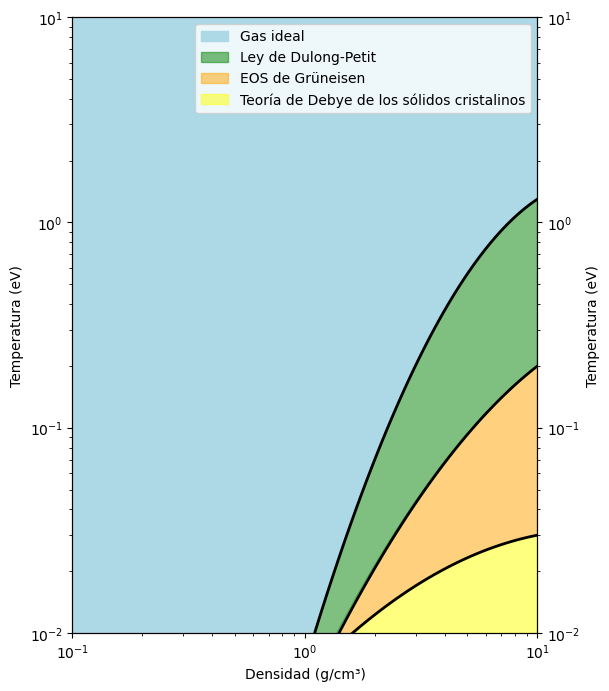

In [26]:
def make_convex_curve(start, end, height_factor=0.1):
    x = np.array([start[0], (start[0]+end[0])/2, end[0]])
    y = np.array([start[1], (start[1]+end[1])/2 + height_factor, end[1]])
    coeffs = np.polyfit(np.log10(x), np.log10(y), 2)
    poly = np.poly1d(coeffs)

    # Generate a smooth curve by evaluating the polynomial
    xs = np.logspace(np.log10(start[0]), np.log10(end[0]), 100)
    ys = 10**poly(np.log10(xs))
    return xs, ys

def make_convex_curve_(start, end, n,height_factor=0.1):
    x = np.array([start[0], (start[0]+end[0])/2, end[0]])
    y = np.array([start[1], (start[1]+end[1])/2 + height_factor, end[1]])
    coeffs = np.polyfit(np.log10(x), np.log10(y), 2)
    poly = np.poly1d(coeffs)

    # Generate a smooth curve by evaluating the polynomial
    xs = np.logspace(np.log10(start[0]), np.log10(end[0]), n)
    ys = 10**poly(np.log10(xs))
    return xs, ys
# Adjust the colored areas to match the specific curves from the provided image

# Define the specific points for each curve as provided earlier
curve1_start, curve1_end = (1.1, 0.01), (10, 1.4)
curve2_start, curve2_end = (1.4, 0.01), (10, 0.2)
curve3_start, curve3_end = (1.6, 0.01), (10, 0.02)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 8))

# Generate the specific curves based on the provided points
curve1_x, curve1_y = make_convex_curve((1.1, 0.01), (10, 1.3), height_factor=0.01)
curve2_x, curve2_y = make_convex_curve((1.4, 0.01), (10, 0.2), height_factor=0.005)
curve3_x, curve3_y = make_convex_curve((1.6, 0.01), (10, 0.03), height_factor=0.005)



# Fill the areas between the curves and the axes with the corresponding colors
x_fill = np.linspace(0.1,curve1_x.min() , 100) #1.088099999

left_fill_x = np.linspace(0.1, min(curve1_x), 100)
ax.fill_between(left_fill_x, 10**-2, 10, color='skyblue', alpha=1)

min_curve2_x = min(curve2_x)

# Count how many values in curve1_x are less than or equal to min_curve2_x
count = np.sum(curve1_x <= min_curve2_x)

# Add zeros to the beginning of curve2_y
extended_curve2_y = np.hstack((np.zeros(count), curve2_y))
extended_curve1_x = np.linspace(0.1,curve1_x.min() , 111)
extended_curve1_x, extended_curve1_y = make_convex_curve_((1.1, 0.01), (10, 1.3), n=111, height_factor=0.01)
extended_curve2_x, extended_curve2_y_ = make_convex_curve_((1.4, 0.01), (10, 0.2),n=107,  height_factor=0.005)

min_curve3_x = min(curve3_x)
count2 = np.sum(curve2_x <= min_curve3_x)
extended_curve3_y = np.hstack((np.zeros(count2), curve3_y))



ax.fill_between(x_fill, 10**-2, 10, color='lightblue', alpha=1)
ax.fill_between(curve1_x, curve1_y, 10, color='lightblue', alpha=1, label='Gas ideal')
ax.fill_between(extended_curve1_x, extended_curve2_y, extended_curve1_y, color='green', alpha=0.5, label='Ley de Dulong-Petit')
ax.fill_between(extended_curve2_x, extended_curve3_y, extended_curve2_y_, color='orange', alpha=0.5, label='EOS de Grüneisen')
ax.fill_between(curve3_x, 0.01, curve3_y, color='yellow', alpha=0.5, label='Teoría de Debye de los sólidos cristalinos')

# Plot the exact curves
ax.plot(curve1_x, curve1_y, 'k-', lw=2)
ax.plot(curve2_x, curve2_y, 'k-', lw=2)
ax.plot(curve3_x, curve3_y, 'k-', lw=2)

# Set the axes to log scale
ax.set_xscale('log')
ax.set_yscale('log')

# Set axis labels and limits
ax.set_xlabel('Densidad (g/cm³)')
ax.set_ylabel('Temperatura (eV)')
ax.set_xlim(0.1, 10)
ax.set_ylim(0.01, 10)

ax2 = ax.twinx()
ax2.set_yscale('log')
ax2.set_ylim(ax.get_ylim())
ax2.set_ylabel('Temperatura (eV)')
# Add the legend
ax.legend()

plt.show()


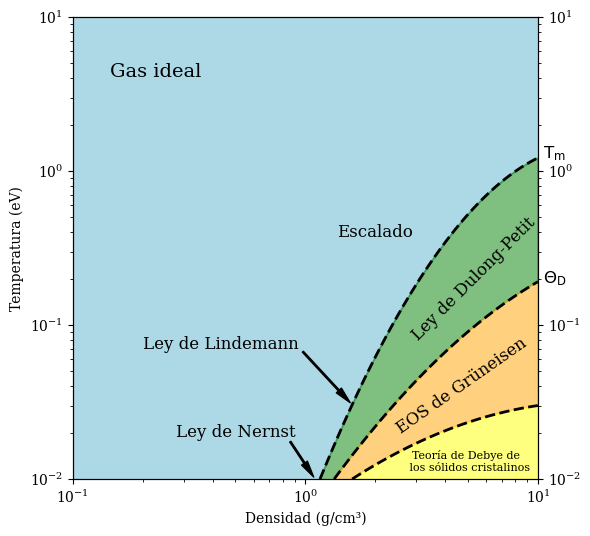

In [8]:
def make_convex_curve(start, end, height_factor=0.1):
    x = np.array([start[0], (start[0]+end[0])/2, end[0]])
    y = np.array([start[1], (start[1]+end[1])/2 + height_factor, end[1]])
    coeffs = np.polyfit(np.log10(x), np.log10(y), 2)
    poly = np.poly1d(coeffs)

    # Generate a smooth curve by evaluating the polynomial
    xs = np.logspace(np.log10(start[0]), np.log10(end[0]), 100)
    ys = 10**poly(np.log10(xs))
    return xs, ys

def make_convex_curve_(start, end, n,height_factor=0.1):
    x = np.array([start[0], (start[0]+end[0])/2, end[0]])
    y = np.array([start[1], (start[1]+end[1])/2 + height_factor, end[1]])
    coeffs = np.polyfit(np.log10(x), np.log10(y), 2)
    poly = np.poly1d(coeffs)

    # Generate a smooth curve by evaluating the polynomial
    xs = np.logspace(np.log10(start[0]), np.log10(end[0]), n)
    ys = 10**poly(np.log10(xs))
    return xs, ys
# Adjust the colored areas to match the specific curves from the provided image

# Define the specific points for each curve as provided earlier
curve1_start, curve1_end = (1.1, 0.01), (10, 1.4)
curve2_start, curve2_end = (1.4, 0.01), (10, 0.2)
curve3_start, curve3_end = (1.6, 0.01), (10, 0.02)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
plt.rc('font', family='serif')

# Generate the specific curves based on the provided points
curve1_x, curve1_y = make_convex_curve((1.15574, 0.01), (10, 1.21705), height_factor=0.01)
curve2_x, curve2_y = make_convex_curve((1.32991, 0.01), (10, 0.19113), height_factor=0.005)
curve3_x, curve3_y = make_convex_curve((1.58967, 0.01), (10, 0.03), height_factor=0.005)



# Fill the areas between the curves and the axes with the corresponding colors
x_fill = np.linspace(0.1,curve1_x.min() , 100) #1.088099999

left_fill_x = np.linspace(0.1, min(curve1_x), 100)
ax.fill_between(left_fill_x, 10**-2, 10, color='skyblue', alpha=1)

min_curve2_x = min(curve2_x)

# Count how many values in curve1_x are less than or equal to min_curve2_x
count = np.sum(curve1_x <= min_curve2_x)

# Add zeros to the beginning of curve2_y
extended_curve2_y = np.hstack((np.zeros(count), curve2_y))
extended_curve1_x = np.linspace(0.1,curve1_x.min() , 111)
extended_curve1_x, extended_curve1_y = make_convex_curve_((1.15574, 0.01), (10, 1.21705), n=107, height_factor=0.01)
extended_curve2_x, extended_curve2_y_ = make_convex_curve_((1.32991, 0.01), (10, 0.19113),n=109,  height_factor=0.005)

min_curve3_x = min(curve3_x)
count2 = np.sum(curve2_x <= min_curve3_x)
extended_curve3_y = np.hstack((np.zeros(count2), curve3_y))



ax.fill_between(x_fill, 10**-2, 10, color='lightblue', alpha=1)
ax.fill_between(curve1_x, curve1_y, 10, color='lightblue', alpha=1, label='Gas ideal')
ax.fill_between(extended_curve1_x, extended_curve2_y, extended_curve1_y, color='green', alpha=0.5, label='Ley de Dulong-Petit')
ax.fill_between(extended_curve2_x, extended_curve3_y, extended_curve2_y_, color='orange', alpha=0.5, label='EOS de Grüneisen')
ax.fill_between(curve3_x, 0.01, curve3_y, color='yellow', alpha=0.5, label='Teoría de Debye de los sólidos cristalinos')

# Plot the exact curves
ax.plot(curve1_x, curve1_y, 'k--', lw=2)
ax.plot(curve2_x, curve2_y, 'k--', lw=2)
ax.plot(curve3_x, curve3_y, 'k--', lw=2)

# Set the axes to log scale
ax.set_xscale('log')
ax.set_yscale('log')

# Set axis labels and limits
ax.set_xlabel('Densidad (g/cm³)')
ax.set_ylabel('Temperatura (eV)')
ax.set_xlim(0.1, 10)
ax.set_ylim(0.01, 10)

ax2 = ax.twinx()
ax2.set_yscale('log')
ax2.set_ylim(ax.get_ylim())

ax2.text(1, 1.3, '$\ \mathrm{T_m}$', transform=ax2.get_yaxis_transform(), ha='left', va='center', font='serif', fontsize=12)
ax2.text(1, 0.2, '$\ \mathrm{\Theta_D}$', transform=ax2.get_yaxis_transform(), ha='left', va='center', font='serif',fontsize=12)
ax.text(0.08, 0.9, 'Gas ideal', transform=ax.transAxes, fontsize=14,
         verticalalignment='top',font='serif' )



text_x, text_y = 0.8, 0.07

arrow_x_start, arrow_y_start = text_x + 0.15, text_y
arrow_x_end, arrow_y_end = 1.6, 0.03
ax.annotate('', xy=(arrow_x_end, arrow_y_end), xytext=(arrow_x_start, arrow_y_start),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
ax.text(0.2, 0.07, 'Ley de Lindemann', family='serif', fontsize=12)


ax.text(2.8, 0.08, 'Ley de Dulong-Petit', fontsize=12, family='serif', rotation=45)
ax.text(2.4, 0.02, 'EOS de Grüneisen', fontsize=12, family='serif', rotation=35)
ax.text(5, 0.013, 'Teoría de Debye de \n los sólidos cristalinos', fontsize=8, family='serif', horizontalalignment='center', verticalalignment='center')
ax.text(0.5, 0.02, 'Ley de Nernst', fontsize=12, family='serif', horizontalalignment='center', verticalalignment='center')
ax.text(2, 0.4, 'Escalado', fontsize=12, family='serif', horizontalalignment='center', verticalalignment='center')

text_x, text_y = 0.7, 0.018
arrow_x_start, arrow_y_start = text_x + 0.15, text_y
arrow_x_end, arrow_y_end = 1.1, 0.01
ax.annotate('', xy=(arrow_x_end, arrow_y_end), xytext=(arrow_x_start, arrow_y_start),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
# Add the legend
#ax.legend()

plt.show()
